# Pregunta 1a

Instalar UN centro de distribucion para minimizar distancia recorridas hacia los clientes
Usando
1. Distancia rectiliena (Manhattan)
2. Distancia Euclidiana
3. Distancia Cuadratica


In [71]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import gurobipy as gp
from gurobipy import GRB

In [14]:
#Cargamos DataFrame
clientes = pd.read_csv('clientes1.csv')
print(clientes.head())

         x        y       peso
0   5.1717  11.9409   638.4000
1  11.1097  12.7871  1090.4400
2  14.3378  10.7421   538.2564
3   0.6172  12.8029  1190.6112
4  11.7165  11.2467  1210.8855


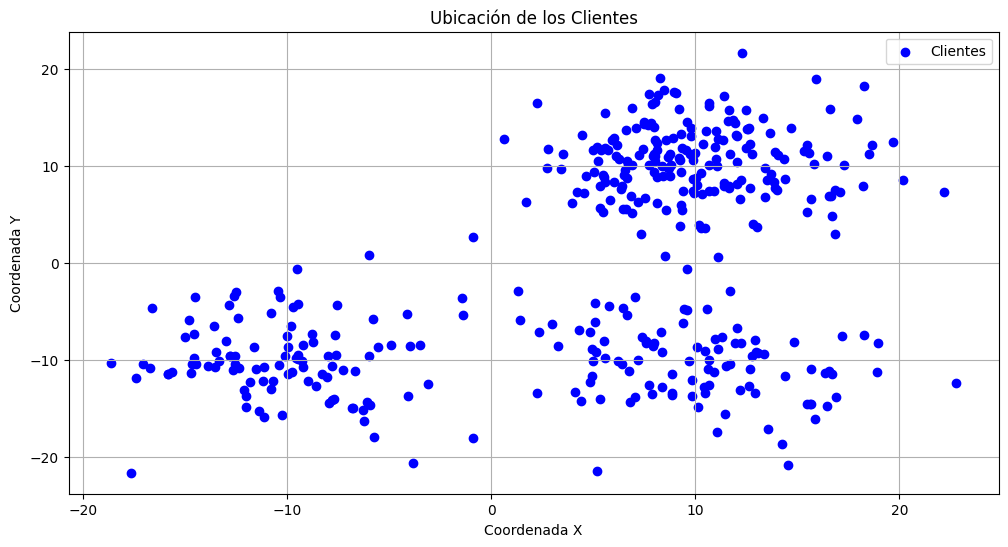

In [58]:
# Graficamos los puntos del DataFrame
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de tu gráfica
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')  # Puntos para los clientes

plt.title('Ubicación de los Clientes')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()


**Distancia Euclidiana**
$$
\min_{x,y} f(x, y) = \sum_{i=1}^{n} w_i \sqrt{(x - a_i)^2 + (y - b_i)^2}
$$

Dada la convexidad de la funcion objetivo, la solución está dada por:

$$
x = \frac{\sum_{i=1}^{n} a_i g_i(x, y)}{\sum_{i=1}^{n} g_i(x, y)}
$$

$$
y = \frac{\sum_{i=1}^{n} b_i g_i(x, y)}{\sum_{i=1}^{n} g_i(x, y)}
$$

donde la función \( g_i(x, y) \) está dada por:

$$
g_i(x, y) = \frac{w_i}{\sqrt{(x - a_i)^2 + (y - b_i)^2}}
$$


In [59]:
#Distancia Euclidiana

# Inicializa las estimaciones para x e y, por ejemplo, usando los promedios ponderados
x = (clientes['x'] * clientes['peso']).sum() / clientes['peso'].sum()
y = (clientes['y'] * clientes['peso']).sum() / clientes['peso'].sum()

# Convergencia y parámetros de iteración
epsilon = 0.02 # umbral de convergencia
max_iter = 1000  # número máximo de iteraciones
iteracion = 0
cambio = float('inf')

# Iterar hasta la convergencia o el número máximo de iteraciones
while cambio > epsilon and iteracion < max_iter:
    # Calcula las g_i(x, y) para la estimación actual de x e y
    g_i = clientes['peso'] / np.sqrt((x - clientes['x'])**2 + (y - clientes['y'])**2)

    # Calcula las nuevas estimaciones de x e y
    new_x = np.sum(clientes['x'] * g_i) / np.sum(g_i)
    new_y = np.sum(clientes['y'] * g_i) / np.sum(g_i)

    # Calcula el cambio como la distancia euclidiana entre las estimaciones antiguas y nuevas
    cambio = np.sqrt((new_x - x)**2 + (new_y - y)**2)

    # Actualiza x e y
    x, y = new_x, new_y

    # Incrementa el contador de iteraciones
    iteracion += 1

# Imprime las coordenadas óptimas
print(f"La ubicación óptima del centro de distribución con distancia Euclidiana es: ({x}, {y})")



La ubicación óptima del centro de distribución con distancia Euclidiana es: (6.849340804380694, 2.7302468128073314)


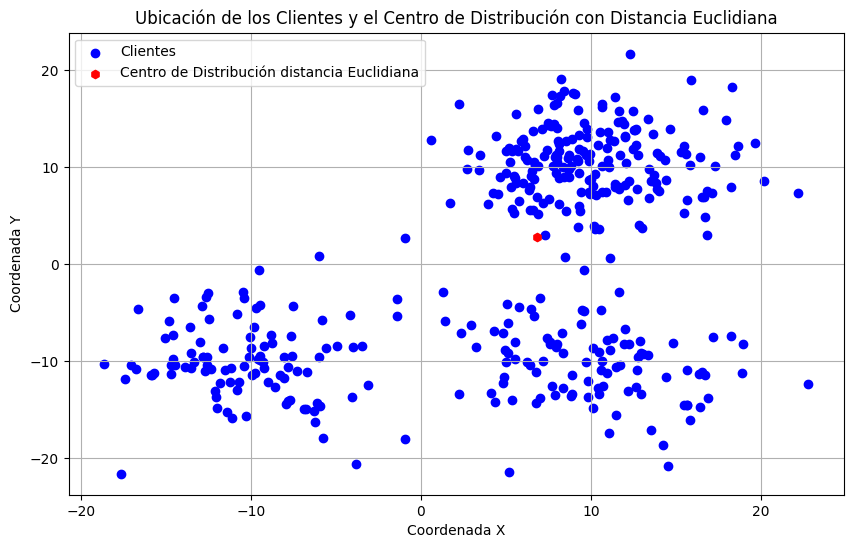

In [64]:
# Graficar los clientes y la ubicación óptima del CD con Distancia Euclidiana
plt.figure(figsize=(10, 6))
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')
plt.scatter(x, y, color='red', marker='h', label='Centro de Distribución distancia Euclidiana')
plt.title('Ubicación de los Clientes y el Centro de Distribución con Distancia Euclidiana')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

**Distancia euclidiana al cuadrado**

La función objetivo para minimizar la suma ponderada de las distancias euclidianas al cuadrado es:

$$
\min_{x, y} f(x, y) = \sum_{i=1}^{n} w_i \left((x - a_i)^2 + (y - b_i)^2\right)
$$

La solución para las coordenadas \( x \) e \( y \) es dada por:

$$
x = \frac{\sum_{i=1}^{n} w_i a_i}{\sum_{i=1}^{n} w_i}
$$

$$
y = \frac{\sum_{i=1}^{n} w_i b_i}{\sum_{i=1}^{n} w_i}
$$


In [62]:
# Calcula las coordenadas óptimas x e y
x_e = (clientes['x'] * clientes['peso']).sum() / clientes['peso'].sum()
y_e = (clientes['y'] * clientes['peso']).sum() / clientes['peso'].sum()

# Imprime las coordenadas óptimas
print(f"La ubicación óptima del centro de distribución usando distancia Euclidiana al Cuadrado es: ({x_e}, {y_e})")


La ubicación óptima del centro de distribución usando distancia Euclidiana al Cuadrado es: (4.763633017454962, -0.1997181724550171)


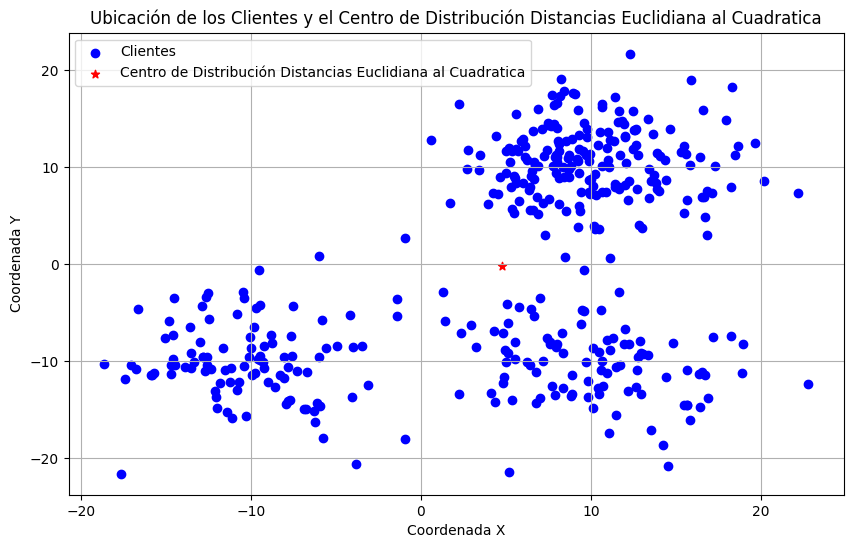

In [65]:
# Graficar los clientes y la ubicación óptima del CD con distancia euclidiana al cuadrado
plt.figure(figsize=(10, 6))
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')
plt.scatter(x_e, y_e, color='red', marker='*', label='Centro de Distribución Distancias Euclidiana al Cuadratica')
plt.title('Ubicación de los Clientes y el Centro de Distribución Distancias Euclidiana al Cuadratica')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

**Distancia rectilinea**

In [66]:
# Ordena los clientes por la coordenada 'x' de menor a mayor
clientes_ordenados = clientes.sort_values('x')

# Calcula el peso total
peso_total = clientes_ordenados['peso'].sum()

# Calcula el peso acumulado para cada cliente
clientes_ordenados['Peso Acumulado'] = clientes_ordenados['peso'].cumsum()

# Encuentra el punto donde el peso acumulado supera la mitad del peso total
mediana_x = clientes_ordenados[clientes_ordenados['Peso Acumulado'] >= peso_total / 2].iloc[0]

# Repite el proceso para la coordenada 'Y'
clientes_ordenados = clientes.sort_values('y')
clientes_ordenados['Peso Acumulado'] = clientes_ordenados['peso'].cumsum()
mediana_y = clientes_ordenados[clientes_ordenados['Peso Acumulado'] >= peso_total / 2].iloc[0]

# Imprime las coordenadas óptimas
print(f"La ubicación óptima del centro de distribución es con distancia Resctilínea: (X: {mediana_x['x']}, Y: {mediana_y['y']})")


La ubicación óptima del centro de distribución es con distancia Resctilínea: (X: 7.9839, Y: -3.4306)


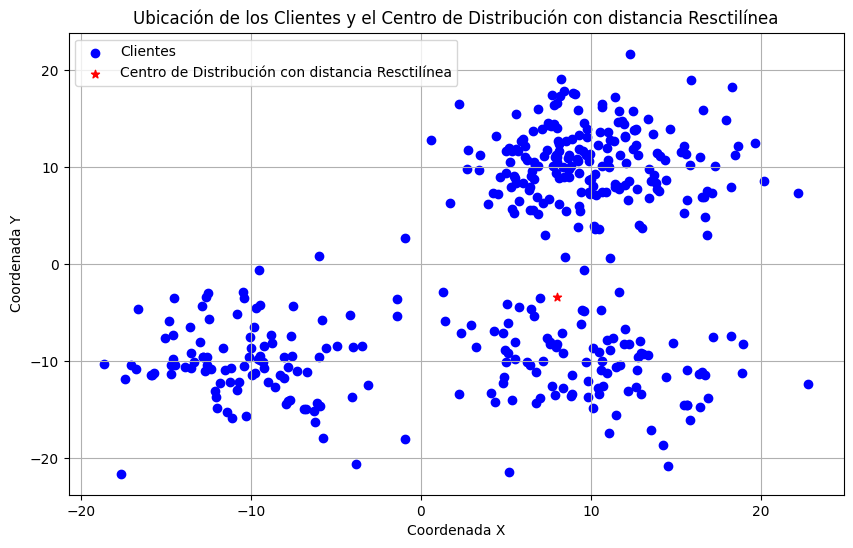

In [67]:
# Graficar los clientes y la ubicación óptima del CD
plt.figure(figsize=(10, 6))
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')
plt.scatter(mediana_x['x'], mediana_y['y'], color='red', marker='*', label='Centro de Distribución con distancia Resctilínea')
plt.title('Ubicación de los Clientes y el Centro de Distribución con distancia Resctilínea')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

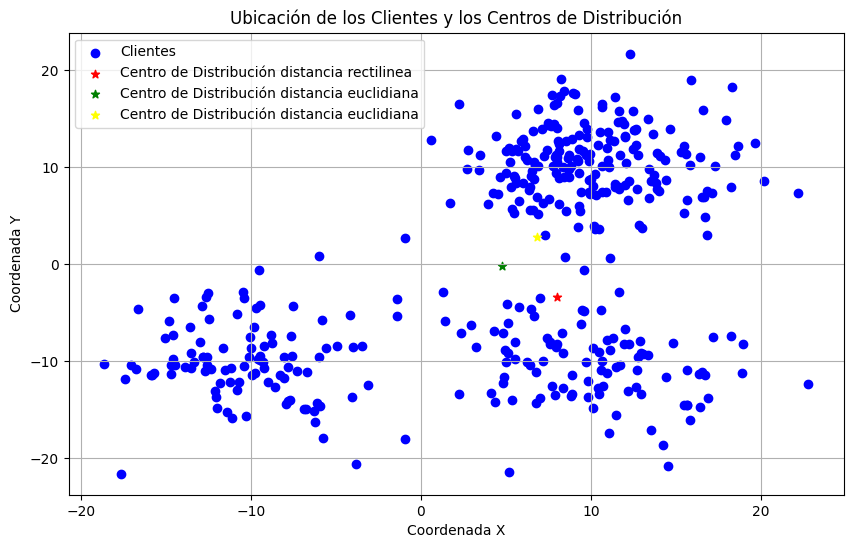

In [69]:
# Graficar los clientes y la ubicación óptima de los CD
plt.figure(figsize=(10, 6))
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')
plt.scatter(mediana_x['x'], mediana_y['y'], color='red', marker='*', label='Centro de Distribución distancia rectilinea')
plt.scatter(x_e, y_e, color='green', marker='*', label='Centro de Distribución distancia euclidiana')
plt.scatter(x, y, color='yellow', marker='*', label='Centro de Distribución distancia euclidiana')
plt.title('Ubicación de los Clientes y los Centros de Distribución')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()

# Pregunta 1b


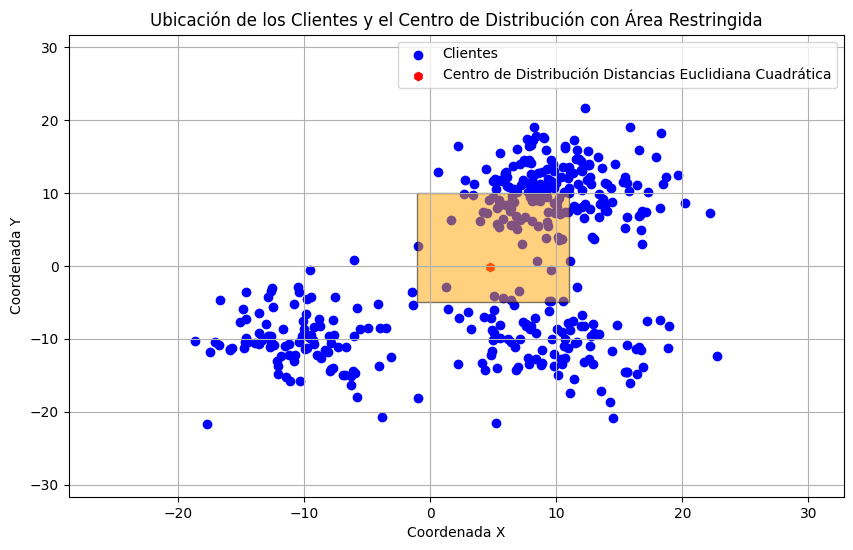

In [56]:

# Suponiendo que tienes las variables x_e, y_e definidas como las coordenadas del centro de distribución
# y 'clientes' es tu DataFrame con las columnas 'x' y 'y' que representan las coordenadas de los clientes

# Crea la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar los clientes
plt.scatter(clientes['x'], clientes['y'], color='blue', label='Clientes')

# Graficar la ubicación óptima del centro de distribución
plt.scatter(x_e, y_e, color='red', marker='h', label='Centro de Distribución Distancias Euclidiana Cuadrática')

# Coordenadas del rectángulo [x_left, y_bottom, width, height]
rect_coords = [-1, -5, 12, 15]  # El rectángulo empieza en (-1, -5) y tiene un ancho de 12 y una altura de 15

# Crea un rectángulo
rectangulo = Rectangle((rect_coords[0], rect_coords[1]), rect_coords[2], rect_coords[3],
                       edgecolor='black', facecolor='orange', alpha=0.5)

# Añade el rectángulo al gráfico para representar la reserva natural
plt.gca().add_patch(rectangulo)

# Añadir título y etiquetas
plt.title('Ubicación de los Clientes y el Centro de Distribución con Área Restringida')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Añade leyenda y cuadrícula
plt.legend()
plt.grid(True)

# Ajusta los límites de la gráfica si es necesario
plt.xlim(clientes['x'].min() - 10, clientes['x'].max() + 10)
plt.ylim(clientes['y'].min() - 10, clientes['y'].max() + 10)

# Muestra el gráfico
plt.show()


In [94]:
# Crea el modelo de optimización
modelo = gp.Model("Optimizar_CD_ rectilineo_con_restricciones")

# Variables de decisión para las coordenadas del CD
x_cdr = modelo.addVar(vtype=GRB.CONTINUOUS, name="x_cdr")
y_cdr = modelo.addVar(vtype=GRB.CONTINUOUS, name="y_cdr")

#definir funcion objetivo
funcion_objetivo = gp.quicksum(clientes['peso'][i] * ((x_cdr - clientes['x'][i])**2 + (y_cdr - clientes['y'][i])**2) 
                                for i in range(len(clientes)))

modelo.setObjective(funcion_objetivo, GRB.MINIMIZE)

# Restricciones para excluir el área restringida
modelo.addConstr(x_cdr <= -1, "Restriccion_X_izquierda")
modelo.addConstr(x_cdr >= 11, "Restriccion_X_derecha")
modelo.addConstr(y_cdr >= 10, "Restriccion_Y_superior")
modelo.addConstr(y_cdr <= -5, "Restriccion_Y_inferior")

# Optimizar el modelo
#modelo.optimize()

#modelo.getVars()
# Optimizar el modelo
modelo.optimize()

# Verificar el estado del modelo y obtener la solución óptima
if modelo.status == GRB.OPTIMAL:
    optimal_x_cdr = x_cdr.X
    optimal_y_cdr = y_cdr.X
    print(f"La ubicación óptima del centro de distribución es: (X: {optimal_x_cdr}, Y: {optimal_y_cdr})")
elif modelo.status == GRB.INF_OR_UNBD:
    print("El modelo es infactible o no acotado")
elif modelo.status == GRB.INFEASIBLE:
    print("El modelo es infactible")
elif modelo.status == GRB.UNBOUNDED:
    print("El modelo es no acotado")


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xe968ecd0
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+05, 4e+06]
  QObjective range [8e+05, 8e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve time: 0.01s

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Model is infeasible or unbounded
El modelo es infactible o no acotado


# Problema 2: Localizacion multiples CD y asignaciones

In [101]:
#Pregunta 2a
cd_df = pd.read_csv('cd.csv')
cd_df.head()


,x,y
0,6.2562,10.7460
1,-12.5283,-2.9782
2,20.1960,8.6045
3,5.5140,-8.0327
4,-10.8213,-13.0088


In [111]:
clientes
X = clientes['x']
Y = clientes['y']
importancia = clientes['peso']
xcd = cd_df['x']
ycd = cd_df['y']

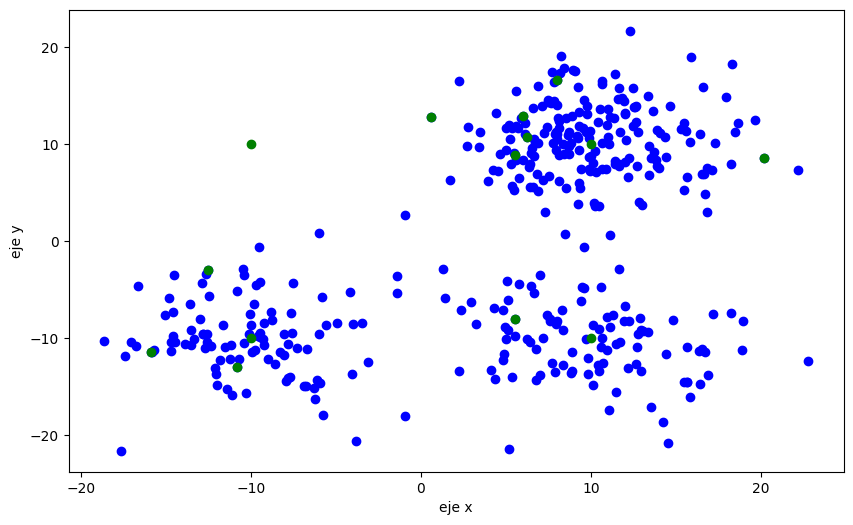

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(X,Y, color = 'blue')
plt.scatter(xcd,ycd, color = 'green')

plt.xlabel("eje x")
plt.ylabel("eje y")
plt.show()

In [98]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from itertools import combinations

# Cargar los datos de los clientes
clientes_df = pd.read_csv('clientes1.csv')
clientes_coords = clientes_df[['x', 'y']].values
clientes_pesos = clientes_df['peso'].values

# Coordenadas de los posibles centros de distribución
coordenadas_cd = np.array([
    [6.2562, 10.746], [-12.5283, -2.9782], [20.196, 8.6045], [5.514, -8.0327],
    [-10.8213, -13.0088], [-15.8588, -11.4011], [5.5049, 8.8979], [6.0226, 12.8756],
    [0.6172, 12.8029], [8.0177, 16.6242], [10, 10], [10, -10], [-10, -10], [-10, 10]
])

# Generar todas las combinaciones posibles de dos centros
todas_combinaciones = list(combinations(coordenadas_cd, 2))

mejor_distancia_total = np.inf
mejor_combinacion = None

# Iterar sobre todas las combinaciones posibles
for combinacion in todas_combinaciones:
    # Calcular la distancia de cada cliente a los centros en la combinación actual
    distancias = cdist(clientes_coords, np.array(combinacion))

    # Ponderar las distancias por el peso de los clientes
    distancias_ponderadas = distancias * clientes_pesos[:, np.newaxis]

    # Encontrar la menor distancia ponderada para cada cliente
    min_distancias = np.min(distancias_ponderadas, axis=1)

    # Calcular la suma total de las distancias mínimas ponderadas
    total_distancia_ponderada = np.sum(min_distancias)

    # Actualizar la mejor combinación si la suma total actual es menor
    if total_distancia_ponderada < mejor_distancia_total:
        mejor_distancia_total = total_distancia_ponderada
        mejor_combinacion = combinacion

print("La mejor combinación de centros es:", mejor_combinacion)
print("Con una distancia total ponderada de:", mejor_distancia_total)

La mejor combinación de centros es: (array([ 5.514 , -8.0327]), array([10., 10.]))
Con una distancia total ponderada de: 3389094.2291909875
